In [30]:
#Import major library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
train = pd.read_csv('train.csv', sep=',')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [32]:
train.shape

(282451, 16)

In [33]:
train = train.dropna()
train.shape

(64818, 16)

In [34]:
train = train.drop('Date', axis = 1)
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
5,13,91,87954.06,False,52.50,3.529,8901.34,637.70,3.85,6169.81,2446.53,130.826194,6.104,A,219622
9,45,72,41820.87,False,41.55,3.816,22832.38,2515.25,4.00,13317.88,2560.48,190.171493,8.424,B,118221
14,6,81,16740.77,False,82.10,3.393,7041.68,276.35,350.16,3373.11,5325.58,223.368093,5.964,A,202505
16,5,40,18882.82,False,64.33,3.308,952.21,116.11,95.01,295.13,4368.45,218.793912,6.300,B,34875
23,19,42,6370.14,False,74.43,3.820,6705.00,282.26,5.43,4414.95,4550.07,138.203387,8.193,A,203819


In [35]:
Y = train.iloc[:,2:3]
train = train.drop('Weekly_Sales', axis = 1)
train = train.drop('Store', axis = 1)
train = train.drop('Dept', axis = 1)

Y.head()

,Weekly_Sales
5,87954.06
9,41820.87
14,16740.77
16,18882.82
23,6370.14


In [36]:
train.head()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
5,False,52.50,3.529,8901.34,637.70,3.85,6169.81,2446.53,130.826194,6.104,A,219622
9,False,41.55,3.816,22832.38,2515.25,4.00,13317.88,2560.48,190.171493,8.424,B,118221
14,False,82.10,3.393,7041.68,276.35,350.16,3373.11,5325.58,223.368093,5.964,A,202505
16,False,64.33,3.308,952.21,116.11,95.01,295.13,4368.45,218.793912,6.300,B,34875
23,False,74.43,3.820,6705.00,282.26,5.43,4414.95,4550.07,138.203387,8.193,A,203819


In [37]:
#Prepare features to simple regression

train['IsHoliday'] = np.where(train['IsHoliday'] == True,1,0)

train.head()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
5,0,52.50,3.529,8901.34,637.70,3.85,6169.81,2446.53,130.826194,6.104,A,219622
9,0,41.55,3.816,22832.38,2515.25,4.00,13317.88,2560.48,190.171493,8.424,B,118221
14,0,82.10,3.393,7041.68,276.35,350.16,3373.11,5325.58,223.368093,5.964,A,202505
16,0,64.33,3.308,952.21,116.11,95.01,295.13,4368.45,218.793912,6.300,B,34875
23,0,74.43,3.820,6705.00,282.26,5.43,4414.95,4550.07,138.203387,8.193,A,203819


In [38]:
from sklearn.preprocessing import LabelEncoder
type_encoder = LabelEncoder()

train['Type'] = type_encoder.fit_transform(train['Type'].values)


In [39]:
train.head()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
5,0,52.50,3.529,8901.34,637.70,3.85,6169.81,2446.53,130.826194,6.104,0,219622
9,0,41.55,3.816,22832.38,2515.25,4.00,13317.88,2560.48,190.171493,8.424,1,118221
14,0,82.10,3.393,7041.68,276.35,350.16,3373.11,5325.58,223.368093,5.964,0,202505
16,0,64.33,3.308,952.21,116.11,95.01,295.13,4368.45,218.793912,6.300,1,34875
23,0,74.43,3.820,6705.00,282.26,5.43,4414.95,4550.07,138.203387,8.193,0,203819


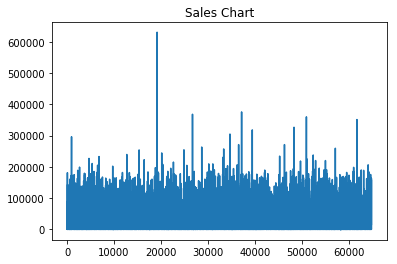

In [40]:
plt.plot(Y.values)
plt.title('Sales Chart')
plt.show()

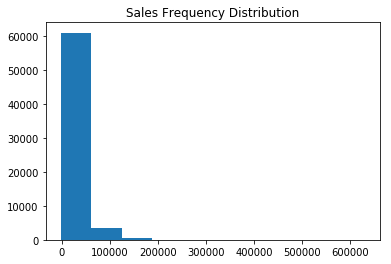

In [41]:
plt.hist(Y.values)
plt.title('Sales Frequency Distribution')
plt.show()

It's necessary to fix outliers

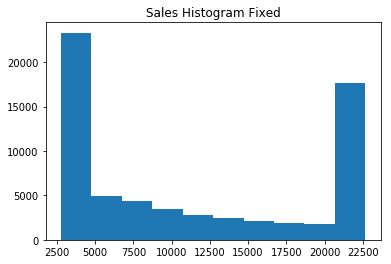

In [42]:
y_firstmodel = np.where(Y>np.percentile(Y,q=75),np.percentile(Y,q=75),
                        np.where(Y<np.percentile(Y,q=25),np.percentile(Y,q=25),Y))
plt.hist(y_firstmodel)
plt.title('Sales Histogram Fixed')
plt.show()

In [43]:
#import Linear Regression module

import statsmodels.api as sm

In [44]:
firstmodel = sm.OLS(y_firstmodel,train)
abstract = firstmodel.fit()

abstract.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                 1.122e+04
Date:                Sat, 31 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:55:39   Log-Likelihood:            -6.7421e+05
No. Observations:               64818   AIC:                         1.348e+06
Df Residuals:                   64806   BIC:                         1.349e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
IsHoliday      138.8187    125.103      1.110      0.267    -106.383     384.020
Temperature      7.3304      1.951      3.757      0.000       3.506      11.154
Fuel_Price    1220.4521     80.231     15.212      0.000    1063.199    1377.705
MarkDown1        0.0067      0.006      1.073      0.283      -0.006       0.019
MarkDown2        0.0169      0.004      4.595      0.000       0.010       0.024
MarkDown3        0.0247      0.003      7.430      0.000       0.018       0.031
MarkDown4       -0.0063      0.008     -0.794      0.427      -0.022       0.009
MarkDown5        0.0342      0.005      7.002      0.000       0.025       0.044
CPI             -2.9980      0.726     -4.128      0.000      -4.421      -1.575
Unemployment  -143.6291     19.568     -7.340      0.000    -181.982    -105.276
Type          1342.2749    122.560     10.952      0.000    1102.058    1582.492
Size             0.0462      0.001     37.462      0.000       0.044       0.049
==============================================================================
Omnibus:                      933.603   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6530.202
Skew:                           0.300   Prob(JB):                         0.00
Kurtosis:                       1.566   Cond. No.                     7.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

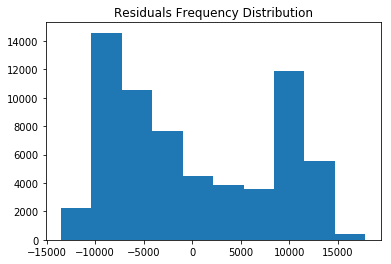

In [45]:
plt.hist(np.array(abstract.resid))
plt.title('Residuals Frequency Distribution')
plt.show()

## Conclusion:

Isholiday , MarkDown1 MarkDown4 have no power by OLS method
High Temperatures Favor Sales,   Fuel_Price and Type 1 as well
CPI and Unemployment are bad to sales

Markdown2 1.6% will be part of total sales
As 2.4% MarkDown3 and 3.4% MarkDown5
All with positive effect
